## <b>■ 딥러닝 복습</b>
    1장. numpy
    2장. 퍼셉트론
    3장. 3층 신경망 구현
    4장. 2층 신경망 구현(수치미분)
    5장. 2층 신경망 구현(오차역전파)      tensorflow 1.x -> tensorflow 2.x
    --------------------------------------------------------------------
    6장. 신경망 학습시키는 기술들
    7장. CNN을 이용한 신경망 구현
    -------------------------------------------------------------------- 자전거 타는 법

    6장. 신경망 학습시키는 기술들
        1. 언더피팅 방지하는 방법
            - 가중치 초기값 선정
                ① Xavier
                ② He
            - 배치 정규화
        2. 오버피팅 방지하는 방법
### <b>■ 텐서플로우로 가중치 초기값 선정하는 방법</b>
    1. Xavier
![fig6-14](fig6-13.png)

$$ {{1} \over {\sqrt{n}}} \cdot \rm{np.random.randn(r,c)}$$

In [ ]:
W1 = tf.get_variable(name='W1', shape=[784,50], initializer = tf.contrib.layers.xavier_initializer())

    2. He 가중치 초기값 구성
$$ \sqrt{{{2} \over {n}}} \cdot \rm{np.random.randn(r,c)} $$

In [ ]:
W1 = tf.get_variable(name="W1", shape=[784,50], initializer = tf.contrib.layers.variance_scaling_initializer())

#### 예제1. 어제 마지막 문제로 만들었던 텐서 플로우로 구현한 신경망 코드에 가중치 초기값을 xavier로 해서 구현하시오

In [9]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

tf.reset_default_graph()

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name='W1', shape=[784,50], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.ones([1,50]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)

# 출력층
W2 = tf.get_variable(name='W2', shape=[50,10], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y_hat,W2) + b2
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
{1} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.92
{2} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.98
{3} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.99
{4} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.94
{5} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
{6} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{7} 에폭 훈련데이터 정확도 :  0.96 	 테스트 데

### ※ 문제137. 이번에는 가중치 초기값을 He로 해서 수행하시오

In [10]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,50]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)

# 출력층
W2 = tf.get_variable(name="W2", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y_hat,W2) + b2
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
{1} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
{2} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 1.0
{3} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{4} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.99
{5} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{6} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.93
{7} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
{8} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
{9} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
{10} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
{11} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{12} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
{13} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.95
{14} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{15} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
{16} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
{17} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
{18} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.

### ※ 문제138. 위의 2층 신경망을 3층 신경망으로 변경하시오
    기존층 : 입력층 -------> 은닉1층 ------> 출력층
             784             100             10
    변경후 : 입력층 -------> 은닉1층 ------> 은닉2층 -------> 출력층
             784             100             50              10

In [12]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,100]))

y = tf.matmul(x, W1) + b1
y_hat = tf.nn.relu(y)

# 은닉2층
W2 = tf.get_variable(name="W2", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,50]))

y2 = tf.matmul(y_hat,W2) + b2
y2_hat = tf.nn.relu(y2)

# 출력층
W3 = tf.get_variable(name="W3", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y2_hat,W3) + b3
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
{1} 에폭 훈련데이터 정확도 :  0.91 	 테스트 데이터 정확도: 0.95
{2} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
{3} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.98
{4} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.93
{5} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.97
{6} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.96
{7} 에폭 훈련데이터 정확도 :  0.97 	 테스트 데이터 정확도: 0.96
{8} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
{9} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.96
{10} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
{11} 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
{12} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
{13} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{14} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
{15} 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.94
{16} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.93
{17} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
{18} 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확

### <b>■ 텐서 플로우로 배치 정규화 구현하는 방법</b>
    배치 정규화 - 신경망 학습시 가중치 값의 데이터가 골고루 분산될 수 있도록 강제화 하는 장치
        층이 깊어져도 가중치의 정규분포를 계속 유지할 수 있도록 층마다 강제화 하는 장치
    
```python
batch_z1 = tf.contrib.layers.batch_norm(z1, True)
```
    Affine1 ------> 배치 정규화 ------> ReLU
     (z1)
     
#### 예제1. 지금까지 완성한 신경망에 배치 정규화를 은닉 1층에 구현하시오

In [13]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,100]))

y1 = tf.matmul(x, W1) + b1

batch_y1 = tf.contrib.layers.batch_norm(y1, True)

y1_hat = tf.nn.relu(batch_y1)

# 은닉2층
W2 = tf.get_variable(name="W2", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,50]))

y2 = tf.matmul(y1_hat,W2) + b2
y2_hat = tf.nn.relu(y2)

# 출력층
W3 = tf.get_variable(name="W3", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y2_hat,W3) + b3
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.97
2 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
3 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.98
4 에폭 훈련데이터 정확도 :  0.96 	 테스트 데이터 정확도: 0.98
5 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
6 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
7 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.94
8 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.94
9 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
10 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
11 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.98
12 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
13 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.93
14 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
15 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.95
16 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 1.0
17 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
18 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
19 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도

### ※ 문제139. 은닉 2층에도 배치 정규화를 적용하시오

In [14]:
import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 은닉1층
x = tf.placeholder('float',[None,784])
W1 = tf.get_variable(name="W1", shape=[784,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([1,100]))

y1 = tf.matmul(x, W1) + b1

batch_y1 = tf.contrib.layers.batch_norm(y1, True)

y1_hat = tf.nn.relu(batch_y1)

# 은닉2층
W2 = tf.get_variable(name="W2", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,50]))

y2 = tf.matmul(y1_hat,W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# 출력층
W3 = tf.get_variable(name="W3", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y2_hat,W3) + b3
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.99
2 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 0.96
3 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.95
4 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
5 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
6 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
7 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
8 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
9 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.99
10 에폭 훈련데이터 정확도 :  0.98 	 테스트 데이터 정확도: 0.97
11 에폭 훈련데이터 정확도 :  0.99 	 테스트 데이터 정확도: 1.0
12 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
13 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
14 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
15 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 1.0
16 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.98
17 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
18 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 0.97
19 에폭 훈련데이터 정확도 :  1.0 	 테스트 데이터 정확도: 

In [ ]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))


### <b>■ 텐서 플로우로 dropout 적용하는 방법</b>
    드롭아웃(dropout) 사용해야하는 이유 - 오버피팅 방지
    구현 예시
```python    
keep_prob = tf.placeholder('float')
    0.8 -> 전체 뉴런 중 80%만 남기고 20% 랜덤으로 삭제
    1.0 -> 모든 뉴런을 그대로 남겨둔다
y3_drop = tf.nn.dropout(y3, keep_prob)
```
    훈련할 때는 뉴런을 삭제하고 테스트 할 때는 뉴런을 삭제하지 않으려고 keep_prob로 남겨둠

In [ ]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat_drop, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

# 그래프 실행
sess = tf.Session()
sess.run(init)

for i in range(1,601*20):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_x_test, batch_y_test = mnist.test.next_batch(100)
    sess.run(train, feed_dict={x:batch_xs, y_onehot:batch_ys})
    if not i % 600:
        print(i//600,"에폭 훈련데이터 정확도 : ",sess.run(accuracy, feed_dict={x:batch_xs, y_onehot:batch_ys}),"\t","테스트 데이터 정확도:", sess.run(accuracy, feed_dict={x:batch_x_test, y_onehot:batch_y_test}))


In [15]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat_drop, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

# 그래프 실행
with tf.Session() as sess:
    sess.run(init)
    for j in range(20):
        for i in range(600):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            test_xs, test_ys = mnist.test.next_batch(100)

            sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 0.9})
            
            if i == 0: # 1에폭마다 정확도 확인
                train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 1.0}) # 훈련 데이터의 정확도 
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0}) # 테스트 데이터의 정확도

                # 그래프용 리스트에 정확도 담기
                train_acc_list.append(train_acc) 
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
훈련 1에폭 정확도 : 0.65
테스트 1에폭 정확도 : 0.46
-----------------------------------------------
훈련 2에폭 정확도 : 0.99
테스트 2에폭 정확도 : 0.98
-----------------------------------------------
훈련 3에폭 정확도 : 0.98
테스트 3에폭 정확도 : 0.99
-----------------------------------------------
훈련 4에폭 정확도 : 1.0
테스트 4에폭 정확도 : 0.98
-----------------------------------------------
훈련 5에폭 정확도 : 0.99
테스트 5에폭 정확도 : 1.0
-----------------------------------------------
훈련 6에폭 정확도 : 0.98
테스트 6에폭 정확도 : 0.98
-----------------------------------------------
훈련 7에폭 정확도 : 1.0
테스트 7에폭 정확도 : 1.0
-----------------------------------------------
훈련 8에폭 정확도 : 0.99
테스트 8에폭 정확도 : 0.98
-----------------------------------------------
훈련 9에폭 정확도 : 1.

KeyboardInterrupt: 

### <b>■ 훈련과 테스트 데이터의 정확도가 시각화 될 수 있도록 코드를 추가 </b>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
훈련 1에폭 정확도 : 0.65
테스트 1에폭 정확도 : 0.42
-----------------------------------------------
훈련 2에폭 정확도 : 0.99
테스트 2에폭 정확도 : 0.99
-----------------------------------------------
훈련 3에폭 정확도 : 1.0
테스트 3에폭 정확도 : 0.99
-----------------------------------------------
훈련 4에폭 정확도 : 1.0
테스트 4에폭 정확도 : 1.0
-----------------------------------------------
훈련 5에폭 정확도 : 1.0
테스트 5에폭 정확도 : 1.0
-----------------------------------------------
훈련 6에폭 정확도 : 1.0
테스트 6에폭 정확도 : 0.99
-----------------------------------------------
훈련 7에폭 정확도 : 0.99
테스트 7에폭 정확도 : 1.0
-----------------------------------------------
훈련 8에폭 정확도 : 0.98
테스트 8에폭 정확도 : 0.99
-----------------------------------------------
훈련 9에폭 정확도 : 1.0
테스트 9에폭 정확도 : 1.0
-----------------------------------------------
훈련 10에폭 정확도 : 1.0
테스트 10에폭 정확도 : 0.99
------------

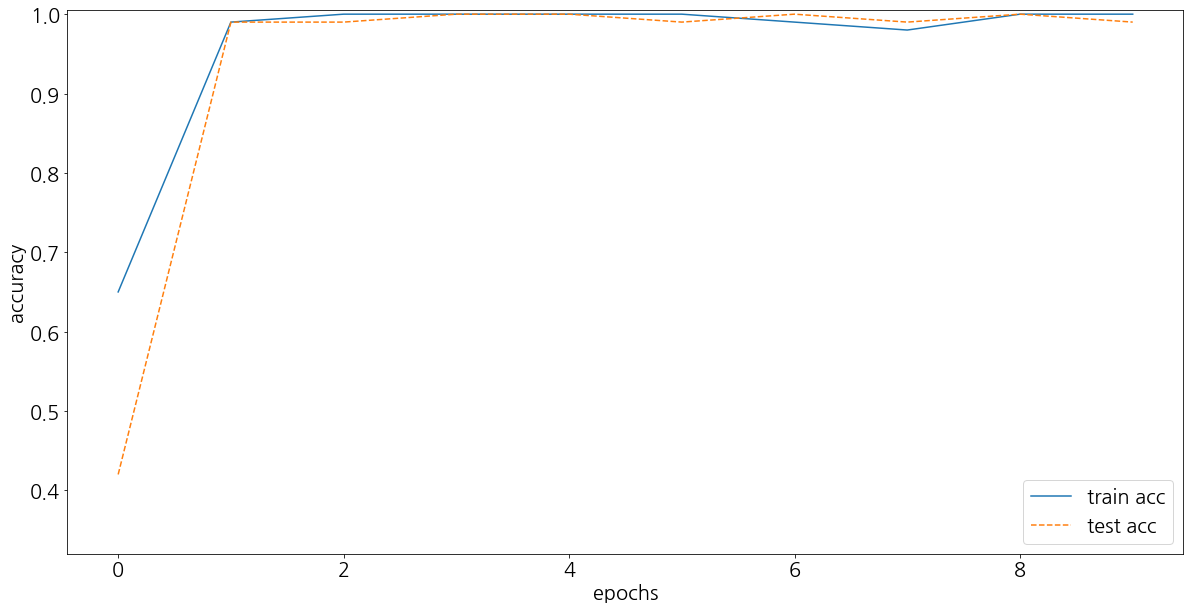

In [19]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME')
y1 = y1 + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W2 = tf.get_variable(name="W2", shape=[14*14*32,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([1,100]))

y2 = tf.matmul(y1, W2) + b2

batch_y2 = tf.contrib.layers.batch_norm(y2, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W3 = tf.get_variable(name="W3", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,50]))

y3 = tf.matmul(y2_hat_drop, W3) + b3

batch_y3 = tf.contrib.layers.batch_norm(y3, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W4 = tf.get_variable(name="W4", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W4) + b4
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

# 그래프 실행
with tf.Session() as sess:
    sess.run(init)
    for j in range(10):
        for i in range(600):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            test_xs, test_ys = mnist.test.next_batch(100)

            sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 0.9})
            
            if i == 0: # 1에폭마다 정확도 확인
                train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 1.0}) # 훈련 데이터의 정확도 
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0}) # 테스트 데이터의 정확도

                # 그래프용 리스트에 정확도 담기
                train_acc_list.append(train_acc) 
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')
                
# 그래프 작성
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.plot()
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(min(min(train_acc_list),min(test_acc_list))-0.1, 1.005)
plt.legend(loc='lower right')
plt.show()


### ※ 문제140. 위의 CNN 신경망을 아래와 같이 구현하시오
    변경 전 : 입력층 ----> Conv1 ----> pooling ----> FC1층 ----> FC2층 ----> 출력층
              784          32                        100         50          10
    변경 후 : 입력층 ----> Conv1 ----> pooling ----> Conv2 ----> pooling ----> FC1층 ----> FC2층 ----> 출력층
              784          32                         64                       100         50          10

In [24]:

import tensorflow as tf
import numpy as np
import warnings
import os
from tensorflow.examples.tutorials.mnist import input_data
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

tf.reset_default_graph() # 텐서 그래프 초기화 하는 코드

# 입력층
x = tf.placeholder('float',[None,784])
x1 = tf.reshape(x,[-1,28,28,1]) # 흑백사진, 1층, batch 개수를 모르므로 -1. 2차원 -> 4차원으로 변경

# Convolution 1층
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01)) # 필터 32개 생성
b1 = tf.Variable(tf.ones([32])) # 숫자 1로 채워진 bias 생성
y1 = tf.nn.conv2d(x1, W1, strides=[1,1,1,1], padding='SAME') + b1
y1 = tf.nn.relu(y1)
y1 = tf.nn.max_pool(y1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize : 필터 사이즈
# y1 = tf.reshape(y1, [-1,14*14*32]) # y1 4차원 -> 2차원

# Convolution 2층
W2 = tf.Variable(tf.random_normal([5,5,32,64], stddev=0.01)) 
b2 = tf.Variable(tf.ones([64])) # 숫자 1로 채워진 bias 생성
y2 = tf.nn.conv2d(y1, W2, strides=[1,1,1,1], padding='SAME') + b2
y2 = tf.nn.relu(y2)
y2 = tf.nn.max_pool(y2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 
y2 = tf.reshape(y2, [-1,7*7*64]) # y1 4차원 -> 2차원

# 완전연결계층 1층 (2층)
W3 = tf.get_variable(name="W3", shape=[7*7*64,100], initializer = tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.ones([1,100]))

y3 = tf.matmul(y2, W3) + b3

batch_y2 = tf.contrib.layers.batch_norm(y3, True)

y2_hat = tf.nn.relu(batch_y2)

# drop out
keep_prob = tf.placeholder('float')
y2_hat_drop = tf.nn.dropout(y2_hat, keep_prob)

# 완전연결계층 2층 (3층)
W4 = tf.get_variable(name="W4", shape=[100,50], initializer = tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.ones([1,50]))

y4 = tf.matmul(y2_hat_drop, W4) + b4

batch_y3 = tf.contrib.layers.batch_norm(y4, True)

y3_hat = tf.nn.relu(batch_y3)

# 출력층 (4층)
W5 = tf.get_variable(name="W5", shape=[50,10], initializer = tf.contrib.layers.variance_scaling_initializer())
b5 = tf.Variable(tf.ones([1,10]))

z = tf.matmul(y3_hat,W5) + b5
z_hat = tf.nn.softmax(z)
y_predict = tf.argmax(z_hat, axis=1)

# 정확도 확인
y_onehot = tf.placeholder('float',[None,10]) # 정답 데이터를 담을 배열
y_label = tf.argmax(y_onehot, axis=1)

correction_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correction_prediction,'float'))

# 오차 확인
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat+0.0000001), axis=1)
rs = tf.reduce_mean(loss)

# 학습
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

# 그래프 실행
with tf.Session() as sess:
    sess.run(init)
    for j in range(10):
        for i in range(600):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            test_xs, test_ys = mnist.test.next_batch(100)

            sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 0.9})
            
            if i == 0: # 1에폭마다 정확도 확인
                train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob: 1.0}) # 훈련 데이터의 정확도 
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0}) # 테스트 데이터의 정확도

                # 그래프용 리스트에 정확도 담기
                train_acc_list.append(train_acc) 
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')
                
# # 그래프 작성
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (20,10)
# plt.rcParams.update({'font.size':20})

# markers = {'train': 'o', 'test': 's'}
# x = np.arange(len(train_acc_list))

# plt.plot()
# plt.plot(x, train_acc_list, label='train acc')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
# plt.xlabel("epochs")
# plt.ylabel("accuracy")
# plt.ylim(min(min(train_acc_list),min(test_acc_list))-0.1, 1.005)
# plt.legend(loc='lower right')
# plt.show()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
훈련 1에폭 정확도 : 0.5
테스트 1에폭 정확도 : 0.21
-----------------------------------------------
훈련 2에폭 정확도 : 1.0
테스트 2에폭 정확도 : 0.98
-----------------------------------------------
훈련 3에폭 정확도 : 0.99
테스트 3에폭 정확도 : 1.0
-----------------------------------------------
훈련 4에폭 정확도 : 0.99
테스트 4에폭 정확도 : 0.98
-----------------------------------------------
훈련 5에폭 정확도 : 0.99
테스트 5에폭 정확도 : 0.98
-----------------------------------------------
훈련 6에폭 정확도 : 0.99
테스트 6에폭 정확도 : 0.97
-----------------------------------------------
훈련 7에폭 정확도 : 0.99
테스트 7에폭 정확도 : 1.0
-----------------------------------------------
훈련 8에폭 정확도 : 1.0
테스트 8에폭 정확도 : 0.99
-----------------------------------------------
훈련 9에폭 정확도 : 1.0
테스트 9에폭 정확도 : 1.0
-----------------------------------------------
훈련 10에폭 정확도 : 1.0
테스트 10에폭 정확도 : 0.98
----------

### <b>■ 훈련시킨 가중치와 바이어스를 pickle 파일로 내리는 코드</b>